# Keras - Classifying MNIST dataset with MLP (Version 1)

From Wikipedia, the free encyclopedia (https://en.wikipedia.org/wiki/MNIST_database)

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

The MNIST database contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset. There have been a number of scientific papers on attempts to achieve the lowest error rate; one paper, using a hierarchical system of convolutional neural networks, manages to get an error rate on the MNIST database of 0.23 percent. The original creators of the database keep a list of some of the methods tested on it. In their original paper, they use a support vector machine to get an error rate of 0.8 percent.An extended dataset similar to MNIST called EMNIST has been published in 2017, which contains 240,000 training images, and 40,000 testing images of handwritten digits.

THE MNIST DATABASE of handwritten digits - http://yann.lecun.com/exdb/mnist/

### Loading the MNIST dataset

In [1]:
from tensorflow import keras

In [2]:
from keras.datasets import mnist #importing the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print ("x_train shape = ", x_train.shape, "y_train shape = ", y_train.shape)
print ("x_test shape = ", x_test.shape, "y_test shape = ", y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
x_train shape =  (60000, 28, 28) y_train shape =  (60000,)
x_test shape =  (10000, 28, 28) y_test shape =  (10000,)


### Plotting digits

5


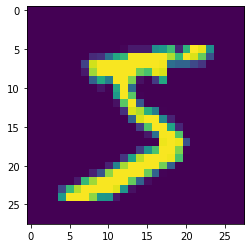

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[0]) #plots the first digit stored in the training dataset
print(y_train[0])

7


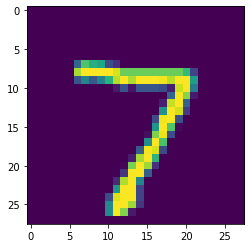

In [12]:
plt.imshow(x_test[0]) #plots the first digit stored in the testing dataset
print(y_test[0])

### Casting inputs to float32

In [13]:
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

### Reshaping inputs

In [19]:
INPUT_DIM = 784 #28 by 28

x_train_reshape = x_train.reshape(60000, INPUT_DIM)
x_test_reshape = x_test.reshape(10000, INPUT_DIM)
print (x_train.shape, "=>", x_train_reshape.shape)
print (x_test.shape,  "=>", x_test_reshape.shape)

(60000, 28, 28) => (60000, 784)
(10000, 28, 28) => (10000, 784)


### Normalizing the inputs

In [21]:
x_train_reshape /= 255
x_test_reshape  /= 255

### Converting labels to one-hot vectors

In [22]:
from keras.utils import np_utils

NB_CLASSES = 10 # (number of classes)
y_train_one_hot = np_utils.to_categorical(y_train, NB_CLASSES) #nb_classes = 10 (number of classes)
y_test_one_hot  = np_utils.to_categorical(y_test, NB_CLASSES)
print ("Dimension of y_train_one_hot = ", y_train_one_hot.shape)
print ("Dimension of y_test_one_hot  = ", y_test_one_hot.shape)
print (y_train[0], "=>", y_train_one_hot[0])
print (y_test[0],  "=>", y_test_one_hot[0])

Dimension of y_train_one_hot =  (60000, 10)
Dimension of y_test_one_hot  =  (10000, 10)
5 => [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
7 => [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### Building the MLP model

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Activation

#MLP - One hidden layer (512 neurons) + Softmax layer (10 classes)
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(INPUT_DIM,)))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### Compiling the model

In [25]:
#from tensorflow.keras.optimizers import SGD

OPTIMIZER = keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=OPTIMIZER, loss='categorical_crossentropy', metrics=['accuracy'])

### Fitting the model

In [26]:
BATCH_SIZE = 128
EPOCHES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2

model_history = model.fit(x=x_train_reshape, y=y_train_one_hot, batch_size=BATCH_SIZE, 
                          epochs=EPOCHES, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/10
375/375 [==============================] - 4s 9ms/step - loss: 0.4770 - accuracy: 0.8758 - val_loss: 0.2849 - val_accuracy: 0.9197
Epoch 2/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2657 - accuracy: 0.9256 - val_loss: 0.2252 - val_accuracy: 0.9377
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 0.2155 - accuracy: 0.9398 - val_loss: 0.1922 - val_accuracy: 0.9466
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1825 - accuracy: 0.9489 - val_loss: 0.1687 - val_accuracy: 0.9537
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1579 - accuracy: 0.9556 - val_loss: 0.1571 - val_accuracy: 0.9570
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1393 - accuracy: 0.9607 - val_loss: 0.1450 - val_accuracy: 0.9603
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1248 - accuracy: 0.9653 - val_loss: 0.1289 - val_accuracy: 0.9639
Epoch 

### Evaluating the model

In [27]:
score = model.evaluate(x_test_reshape, y_test_one_hot, verbose=2) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

313/313 - 1s - loss: 0.1047 - accuracy: 0.9700 - 623ms/epoch - 2ms/step
Test score: 0.1047026515007019
Test accuracy: 0.9700000286102295


### Predicting the class

In [28]:
y_probability = model.predict(x_test_reshape)
y_classes = y_probability.argmax(axis=-1)
print ("True class = ", y_test[0], "Predicted class = ", y_classes[0])

True class =  7 Predicted class =  7


### Plotting the model performances

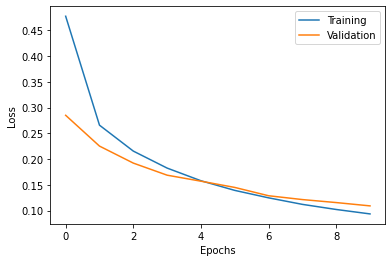

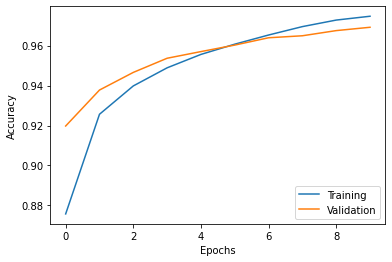

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['accuracy'])
    plt.plot(network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(model_history)

### Saving the trained model and its weights

In [30]:
json_string = model.to_json() # as json 
open('mlp_mnist_v1_model.json', 'w').write(json_string)
# save the weights in h5 format 
model.save_weights('mlp_mnist_v1_wts.h5')

### Retrieving a trained model and its weights

In [31]:
from keras.models import model_from_json
model1 = model_from_json(open('mlp_mnist_v1_model.json').read())
model1.load_weights('mlp_mnist_v1_wts.h5')
model1.summary()
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
score = model1.evaluate(x_test_reshape, y_test_one_hot, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

y_probability = model.predict(x_test_reshape)
y_classes = y_probability.argmax(axis=-1)
print ("True class = ", y_test[0], "Predicted class = ", y_classes[0])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Test score: 0.1047026515007019
Test accuracy: 0.9700000286102295
True class =  7 Predicted class =  7
